purpose: to check the data distributions for the locomotor datasets that were used for meta-analysis. Done primarily at Abe's recommendation to see if it's impacting the ratXcan (if not normalized)- they are in fact normalized.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
#copied from the ratxcan notebook- not all the info here is actually necessary
PRE = "/tscc/projects/ps-palmer/brittany/rat_genomics_paper_pipeline_2024"
OUTPUT = PRE+"/output"
PREDICT_PREF="loco_meta_7k"
PREDICTION=OUTPUT+"/{MODEL_TISSUE}-filtered-{PREDICT_PREF}_predict.txt"
PHENOTYPES=PRE+"/data/phenotype/combined_loco_trait_7k_sorted.fam"
TRAIT="locomotor_activity"
TBL_OUT=OUTPUT+'/'+PREDICT_PREF+'_'+MODEL_TISSUE+'.tsv'

In [6]:
pheno=pd.read_csv(PHENOTYPES, sep='\t',header=None)
pheno.columns=['fid','rfid','loco']

In [7]:
pheno

,fid,rfid,loco
0,933000320045877,933000320045877,-0.628241
1,933000320045878,933000320045878,-0.488571
2,933000320045880,933000320045880,0.216710
3,933000320045883,933000320045883,3.044497
4,933000320045885,933000320045885,0.071954
...,...,...,...
7717,00077E9536,00077E9536,0.766547
7718,00077E99D8,00077E99D8,1.175479
7719,00077E9B37,00077E9B37,-2.139801
7720,00077E9B75,00077E9B75,0.545711


In [3]:
meta_data=pd.read_csv('/tscc/projects/ps-palmer/gwas/databases/pedigree/merged_wfu_samplemetadata_colony_of_origin.csv')

In [4]:
meta_data

,sample_id,library,rfid,project_name,barcode,pcr_barcode,runid,seq_method,pipeline_version,pipeline_round,...,qc_heterozygosity,qc_all,duplicate_rfid,times_genotyped,times_passed,times_failed,sample_use,origin_colony,apurva_exptrack,final_dob
0,Riptide01_933000120117306,Riptide01,933000120117306,u01_olivier_george_cocaine,TGCACTAG,8.0,200221_A00953_0069_BH5T5LDSXY,lcWGS,Hybrid_v1.0.0,10.1,...,pass,pass,0,1,1,0,analysis,"WFU: NMcwiWFsm:HS #13673907, RRID:RGD_13673907",NaN,2017-05-22
1,Riptide01_933000120117307,Riptide01,933000120117307,u01_olivier_george_cocaine,CGTAGCAT,8.0,200221_A00953_0069_BH5T5LDSXY,lcWGS,Hybrid_v1.0.0,10.1,...,pass,pass,0,1,1,0,analysis,"WFU: NMcwiWFsm:HS #13673907, RRID:RGD_13673907",NaN,2017-05-21
2,Riptide01_933000120117311,Riptide01,933000120117311,u01_olivier_george_cocaine,CACTAGAC,8.0,200221_A00953_0069_BH5T5LDSXY,lcWGS,Hybrid_v1.0.0,10.1,...,pass,pass,0,1,1,0,analysis,"WFU: NMcwiWFsm:HS #13673907, RRID:RGD_13673907",NaN,2017-05-22
3,Riptide01_933000120117312,Riptide01,933000120117312,u01_olivier_george_cocaine,TGGTCATG,8.0,200221_A00953_0069_BH5T5LDSXY,lcWGS,Hybrid_v1.0.0,10.1,...,pass,pass,0,1,1,0,analysis,"WFU: NMcwiWFsm:HS #13673907, RRID:RGD_13673907",NaN,2017-05-22
4,Riptide01_933000120117313,Riptide01,933000120117313,u01_olivier_george_cocaine,GCTTAACG,8.0,200221_A00953_0069_BH5T5LDSXY,lcWGS,Hybrid_v1.0.0,10.1,...,pass,pass,0,1,1,0,analysis,"WFU: NMcwiWFsm:HS #13673907, RRID:RGD_13673907",NaN,2017-05-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,P50_Riptide_Oct_2017_00077EAA6C,P50_Riptide_Oct_2017,00077EAA6C,p50_hao_chen_2014,TCGAGTTG,3.0,P50_Riptide_Oct_2017,lcWGS,Hybrid_v1.0.0,10.1,...,pass,pass,1,2,2,0,analysis,MISSING,NaN,2015-04-13
15116,P50_Riptide_Oct_2017_00077EAAE4,P50_Riptide_Oct_2017,00077EAAE4,p50_hao_chen_2014,ACACGTGT,3.0,P50_Riptide_Oct_2017,lcWGS,Hybrid_v1.0.0,10.1,...,pass,pass,1,2,2,0,analysis,MISSING,NaN,2015-04-21
15117,P50_Riptide_Oct_2017_00077EAC01,P50_Riptide_Oct_2017,00077EAC01,p50_hao_chen_2014,CTTCCAAC,3.0,P50_Riptide_Oct_2017,lcWGS,Hybrid_v1.0.0,10.1,...,pass,pass,1,2,2,0,analysis,MISSING,NaN,2015-04-21
15118,P50_Riptide_Oct_2017_00077EAF65,P50_Riptide_Oct_2017,00077EAF65,p50_hao_chen_2014,TGACCACA,3.0,P50_Riptide_Oct_2017,lcWGS,Hybrid_v1.0.0,10.1,...,pass,pass,1,2,2,0,analysis,MISSING,NaN,2015-04-18


In [18]:
tbl=pheno.merge(meta_data[['rfid','project_name','sex']], on='rfid',how='left')
tbl=tbl.sort_values('project_name')

In [12]:
set(tbl.project_name)

{'p50_david_dietz_2020',
 'p50_hao_chen_2014',
 'p50_hao_chen_2020',
 'p50_hao_chen_2020_rnaseq',
 'p50_paul_meyer_2014',
 'p50_shelly_flagel_2014',
 'pilot_fransesca_telese_twas',
 'u01_peter_kalivas_italy',
 'u01_peter_kalivas_us',
 'u01_suzanne_mitchell',
 'u01_tom_jhou'}

/tmp/ipykernel_2784257/600689110.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_xticklabels(fig.get_xticklabels(), rotation=90)


[Text(0.5, 0, 'project name'), Text(0, 0.5, 'locomotor activity')]

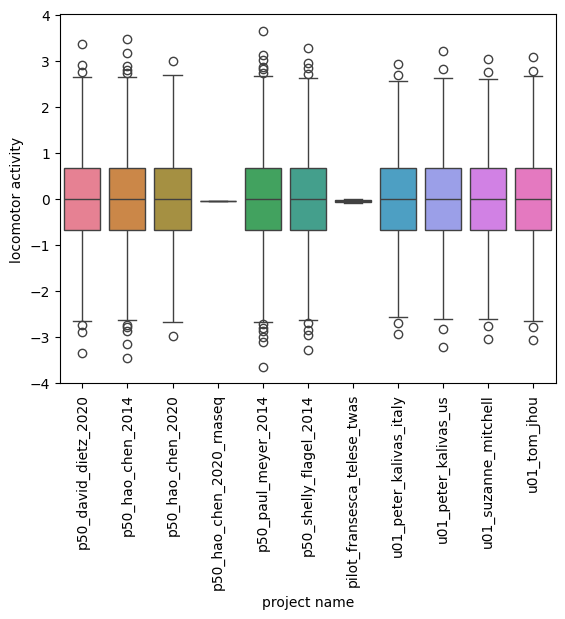

In [36]:
fig=sns.boxplot(x = tbl['project_name'], 
            y = tbl['loco'], 
            hue = tbl['project_name'])
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
fig.set(xlabel='project name', ylabel='locomotor activity')


In [ ]:
fig=sns.boxplot(x = tbl['project_name'], 
            y = tbl['loco'], 
            hue = tbl['project_name'])
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)